# Assignment 3: Sensitivity Analysis with Sobol Indices
#### Moritz Kick, Maximilian Nowak

In [2]:
# Import modules from source
import os, sys
module_path = os.path.abspath(os.path.join('../src'))
if module_path not in sys.path:
    sys.path.append(module_path)

import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as lin

# from sinfo import sinfo
# sinfo()

## Implementation of Sobol indices

### 1. Implement the construction of Sobol matrices

In [3]:
from assignment3.sobol import create_sobol_matrices

pass

### 2. Implement the computation of Sobol total-effect indices

In [4]:
from assignment3.sobol import compute_total_indices

pass

### 3. Verify your implementation

##### Test construction of Sobol matrices with different matrix sizes

In [5]:
from assignment2.lhs import latin_hypercube_uniform

for n_samples, dim in [(3,3), (4,4)]:
    A, B = latin_hypercube_uniform(dim, n_samples), latin_hypercube_uniform(dim, n_samples)  # Generate random samples
    A_B = create_sobol_matrices(A, B)  # Get sobol matrices

    print("Test %ix%i input matrices:" % (n_samples, dim))
    print("A:\n %s" % np.round(A, 4))
    print("B:\n %s" % np.round(B, 4))
    print("A_B:\n %s\n" % np.round(A_B, 4))

Test 3x3 input matrices:
A:
 [[0.5143 0.9212 0.2869]
 [0.8386 0.508  0.8724]
 [0.0359 0.3044 0.6247]]
B:
 [[0.2561 0.4928 0.5019]
 [0.9169 0.223  0.1733]
 [0.3707 0.7784 0.9469]]
A_B:
 [[[0.2561 0.9212 0.2869]
  [0.9169 0.508  0.8724]
  [0.3707 0.3044 0.6247]]

 [[0.5143 0.4928 0.2869]
  [0.8386 0.223  0.8724]
  [0.0359 0.7784 0.6247]]

 [[0.5143 0.9212 0.5019]
  [0.8386 0.508  0.1733]
  [0.0359 0.3044 0.9469]]]

Test 4x4 input matrices:
A:
 [[0.5918 0.5656 0.6052 0.863 ]
 [0.0401 0.3678 0.2806 0.407 ]
 [0.482  0.8298 0.9633 0.6425]
 [0.7543 0.0327 0.0342 0.2024]]
B:
 [[0.903  0.5438 0.8871 0.1092]
 [0.0627 0.4421 0.5465 0.516 ]
 [0.7157 0.8122 0.3294 0.3575]
 [0.4412 0.1039 0.1108 0.9639]]
A_B:
 [[[0.903  0.5656 0.6052 0.863 ]
  [0.0627 0.3678 0.2806 0.407 ]
  [0.7157 0.8298 0.9633 0.6425]
  [0.4412 0.0327 0.0342 0.2024]]

 [[0.5918 0.5438 0.6052 0.863 ]
  [0.0401 0.4421 0.2806 0.407 ]
  [0.482  0.8122 0.9633 0.6425]
  [0.7543 0.1039 0.0342 0.2024]]

 [[0.5918 0.5656 0.8871 0.863 ]
  

##### Test computation of total-effect Sobol indices

In [6]:
from assignment2.lhs import latin_hypercube_uniform

# Generate matrices with Latin hypercube samples
n_samples = 100000
dim = 2
A, B = latin_hypercube_uniform(dim, n_samples), latin_hypercube_uniform(dim, n_samples)

# Get sobol matrices
A_B = create_sobol_matrices(A, B)

# Define the functions to be tested
funcs = {
    'f = x1 + x2': lambda X: X[:, 0] + X[:, 1],
    'f = 2*x1 + x2': lambda X: 2*X[:, 0] + X[:, 1],
    'f = sqrt(2)*x1 + x2': lambda X: (2**(1/2))*X[:, 0] + X[:, 1],
    'f = sqrt(2)*x1 + 10*x1x2 + x2': lambda X: (2**(1/2))*X[:, 0] + 10*(X[:, 0]*X[:, 1]) + X[:, 1],
    'f = sqrt(2)*x1 + log(x1x2) + x2': lambda X: (2**(1/2))*X[:, 0] + np.log(X[:, 0]*X[:, 1]) + X[:, 1],
}

# Compute indicies and display results
for fname, f in funcs.items():
    f_A = f(A)
    f_AB = np.array([f(X) for X in A_B])
    r = compute_total_indices(f_A, f_AB)
    print(fname)
    print("   sti: %.6f, %.6f" % (r[0], r[1]))
    print("   sum: %.6f" % (np.sum(r)))

f = x1 + x2
   sti: 0.503047, 0.501818
   sum: 1.004864
f = 2*x1 + x2
   sti: 0.804506, 0.200635
   sum: 1.005141
f = sqrt(2)*x1 + x2
   sti: 0.670641, 0.334501
   sum: 1.005142
f = sqrt(2)*x1 + 10*x1x2 + x2
   sti: 0.580525, 0.519285
   sum: 1.099810
f = sqrt(2)*x1 + log(x1x2) + x2
   sti: 0.545346, 0.460161
   sum: 1.005507


## Application to the model

### 4. Construct sample matrices $A, B ∈ R^{N×n}$

In [7]:
from assignment2.lhs import latin_hypercube_uniform

# Construct parameter domain like in assignment 2

beta_range = [1, 3]  # average number of contacts per week
alpha_range = [7/14, 7/2]  # mean latency rate per week
gamma_range = [7/14, 7/7]  # mean recovery rate per week
i0_range = [500, 2500]  # initial number of infected individuals

param_domain = np.array([beta_range, alpha_range, gamma_range, i0_range])

# construct samples A and B by LHS sampling
dim = 4
n_samples = 1000
A = latin_hypercube_uniform(dim=dim, n_samples=n_samples, low=param_domain[:, 0], high=param_domain[:, 1])
B = latin_hypercube_uniform(dim=dim, n_samples=n_samples, low=param_domain[:, 0], high=param_domain[:, 1])

# prepare matrices to sample parameter combinations
A_B = create_sobol_matrices(A, B)

print(A.shape)
print(B.shape)
print(A_B.shape)

(1000, 4)
(1000, 4)
(4, 1000, 4)


### 5. Compute vectors $\mathcal{G}_l(A) ∈ R^N$ and $\mathcal{G}_l(A_B^{(i)}) ∈ R^N$

In [8]:
from assignment3.sobol import compute_QoIs_from_samples

# Define initial conditions and parameters
N = 80e6
I0 = 1000
S0 = N - I0
E0 = 0
R0 = 0
C0 = I0
y0 = [N, S0, E0, I0, R0, C0]

# Simulation time
T = 60
t = np.linspace(0, T, T+1)

# get QoI vectors by running seirc with samples from A
g1_A, g2_A = compute_QoIs_from_samples(A, args=(y0, t))

# get QoI vectors by running seirc with sample matrices from A_B
qoIs_A_B = np.array([compute_QoIs_from_samples(A_Bi, args=(y0, t)) for A_Bi in A_B])
g1_A_B, g2_A_B = qoIs_A_B[:, 0], qoIs_A_B[:, 1]


### 6. Compute all Sobol total-effect indices $S_{Ti}$

In [9]:
sTi_g1 = compute_total_indices(g1_A, g1_A_B)
sTi_g2 = compute_total_indices(g2_A, g2_A_B)

print(sTi_g1.shape)
print(sTi_g2.shape)

(4,)
(4,)


### 7.  Display the indices with a bar plot

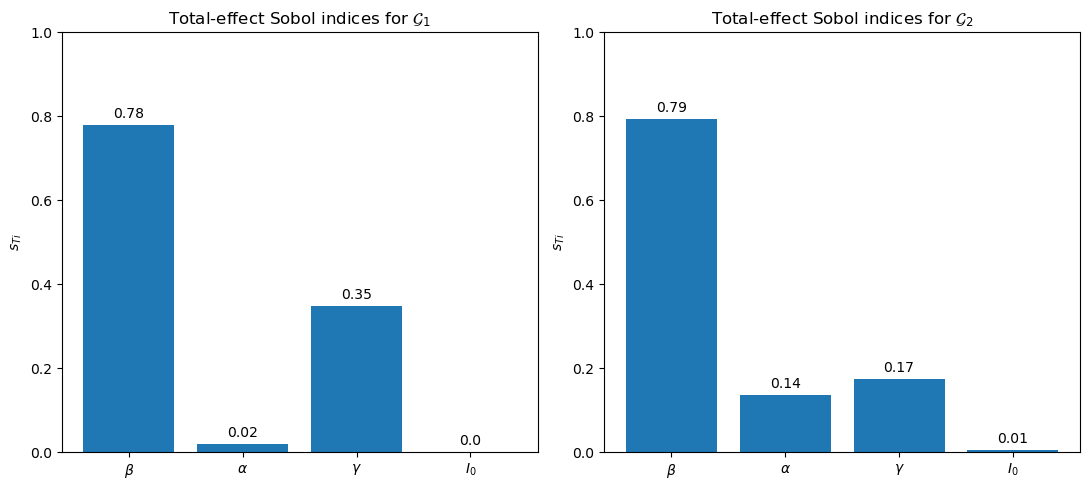

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 5))
labels = [r'$\beta$', r'$\alpha$', r'$\gamma$', r'$I_0$']

# sTi1 for G1
bars1 = ax1.bar(labels, sTi_g1)
ax1.set_ylim(0, 1)
ax1.set_ylabel(r'$s_{Ti}$')
ax1.set_title(r'Total-effect Sobol indices for $\mathcal{G}_1$')

# Adding the exact sTi values on the bars for G1
for bar in bars1:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom')

# sTi1 for G2
bars2 = ax2.bar(labels, sTi_g2)
ax2.set_ylim(0, 1)
ax2.set_ylabel(r'$s_{Ti}$')
ax2.set_title(r'Total-effect Sobol indices for $\mathcal{G}_2$')

# Adding the exact sTi1 values on the bars for G2
for bar in bars2:
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()

### 8. Find a way to quantify the "amount of interaction between the variables"

In [11]:
# sum of all sTi will be one if there's no interaction

# interaction in G1
sum_sTi_g1 = np.sum(sTi_g1)
inter_Xi_g1 = sum_sTi_g1 - 1
print("Interaction between variables Xi in G1: %.6f" % inter_Xi_g1)

# interaction in G2
sum_sTi_g2 = np.sum(sTi_g2)
inter_Xi_g2 = sum_sTi_g2 - 1
print("Interaction between variables Xi in G2: %.6f" % inter_Xi_g2)

Interaction between variables Xi in G1: 0.147092
Interaction between variables Xi in G2: 0.110234
